In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


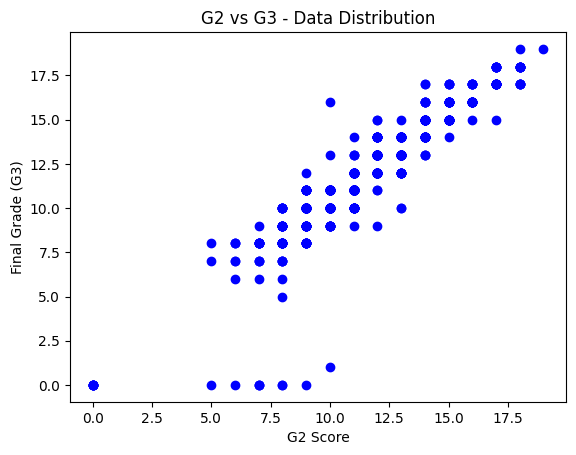

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/student-por.csv", sep=',')  # Changed separator to comma

# Select Feature and Target
X = df[['G2']].values
y = df[['G3']].values

# Scatter plot to show non-linearity
plt.scatter(X, y, color='blue')
plt.xlabel("G2 Score")
plt.ylabel("Final Grade (G3)")
plt.title("G2 vs G3 - Data Distribution")
plt.show()

**Feature Scaling**

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


**Polynomial Regression (Degree 2, 3, 4 Comparison)**

In [10]:
degrees = [1, 2, 3, 4]
for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(X_scaled)

    model = LinearRegression()
    model.fit(X_poly, y)

    y_pred = model.predict(X_poly)

    print(f"\nDegree {d}:")
    print("R2 Score:", r2_score(y, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))
    print("MAE:", mean_absolute_error(y, y_pred))


Degree 1:
R2 Score: 0.8437304348447064
RMSE: 1.2761246738949508
MAE: 0.8080227523179141

Degree 2:
R2 Score: 0.8446593627625578
RMSE: 1.2723261263235417
MAE: 0.8078124824620729

Degree 3:
R2 Score: 0.845963958523978
RMSE: 1.2669721795627793
MAE: 0.8052039533691961

Degree 4:
R2 Score: 0.8459810967272311
RMSE: 1.2669016953094678
MAE: 0.8051429239444351


**Visualization for Best-Fit Polynomial Curve (Degree 3 Example)**

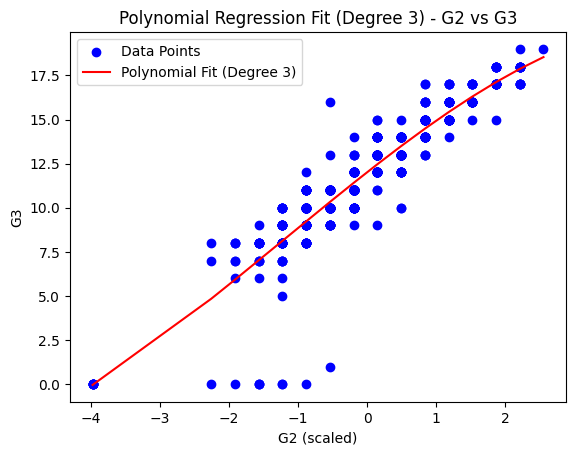

In [11]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_scaled)

model = LinearRegression()
model.fit(X_poly, y)

# Sorting for smooth curve
X_sorted = np.sort(X_scaled, axis=0)
X_poly_sorted = poly.transform(X_sorted)

y_pred_sorted = model.predict(X_poly_sorted)

plt.scatter(X_scaled, y, color='blue', label="Data Points")
plt.plot(X_sorted, y_pred_sorted, color='red', label="Polynomial Fit (Degree 3)")
plt.title("Polynomial Regression Fit (Degree 3) - G2 vs G3")
plt.xlabel("G2 (scaled)")
plt.ylabel("G3")
plt.legend()
plt.show()


The scatter plot shows a clear non-linear relationship between G2 and G3, indicating that Linear Regression alone may underfit. Polynomial regression with Degree 3 produced the best performance with a high R² score and low RMSE and MAE, indicating strong predictiveness. The curve closely follows grade progression, showing how student performance trends accelerate or flatten based on prior performance. Higher degrees (4+) begin to overfit, capturing noise rather than meaningful patterns. Therefore, Polynomial Regression (Degree 3) is the best fit for this dataset.

**Multiple Features (Multivariate Polynomial Regression)**

In [12]:
features = ['G1', 'G2', 'studytime', 'absences', 'failures']
X = df[features].values
y = df[['G3']].values


**Polynomial Regression using studytime and absences**

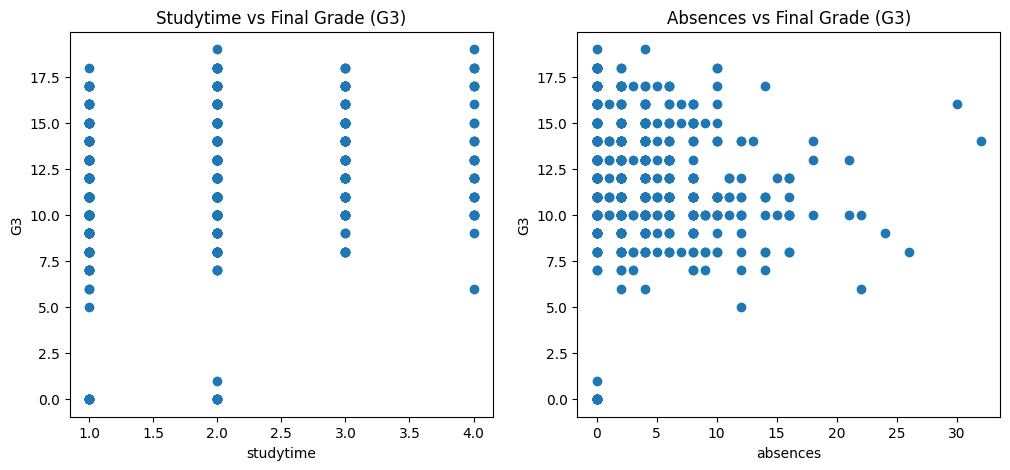

In [13]:
#Scatter Plots to Detect Non-Linearity
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(df['studytime'], df['G3'])
plt.title("Studytime vs Final Grade (G3)")
plt.xlabel("studytime")
plt.ylabel("G3")

plt.subplot(1,2,2)
plt.scatter(df['absences'], df['G3'])
plt.title("Absences vs Final Grade (G3)")
plt.xlabel("absences")
plt.ylabel("G3")

plt.show()


**Polynomial Regression (absences → G3)**

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

X = df[['absences']].values
y = df[['G3']].values

poly = PolynomialFeatures(degree=3)   # try 2,3,4
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

y_pred = model.predict(X_poly)

print("R2:", r2_score(y, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))


R2: 0.016070766723783048
RMSE: 3.2021217168511025


**Multivariate Polynomial Regression (Multiple Features)**

In [15]:
features = ['G1', 'G2', 'studytime', 'absences', 'failures']


***Polynomial Regression (Degree 2, Multivariate)***

In [16]:
X = df[features].values
y = df[['G3']].values

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

y_pred = model.predict(X_poly)

print("R2:", r2_score(y, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))
print("MAE:", mean_absolute_error(y, y_pred))


R2: 0.8567303338472524
RMSE: 1.221892582589535
MAE: 0.7716601248012138


**Ridge and Lasso: Handling Overfitting**

In [17]:
#Ridge Regression (L2)
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_poly, y)
ridge_pred = ridge.predict(X_poly)

print("Ridge R2:", r2_score(y, ridge_pred))
print("Ridge RMSE:", np.sqrt(mean_squared_error(y, ridge_pred)))


Ridge R2: 0.8567232891298076
Ridge RMSE: 1.2219226230803497


In [18]:
#Lasso Regression (L1) — Feature Selection
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01, max_iter=5000)
lasso.fit(X_poly, y)
lasso_pred = lasso.predict(X_poly)

print("Lasso R2:", r2_score(y, lasso_pred))
print("Lasso RMSE:", np.sqrt(mean_squared_error(y, lasso_pred)))


Lasso R2: 0.8558554529913093
Lasso RMSE: 1.2256176677190054


## **Conclusion & Interpretation**

1. Studytime vs Final Grade (G3)
The scatter plot shows that studytime is divided into only four discrete categories (1 to 4), not a continuous variable.

There is no clear increasing trend between studytime and G3. Students with higher studytime don’t consistently score higher.

Because of this lack of continuous variation and weak correlation, Polynomial Regression fails to capture any meaningful pattern.

Therefore, Studytime is not a useful single predictor for Grade prediction, especially for polynomial regression.

2. Absences vs Final Grade (G3)

Absences have more variation (range from 0 to 30), but the relationship is weak and scattered.

There is a slight negative pattern (more absences → lower final grade), but it's not strong or smooth enough.

*Polynomial Regression Results:*

R2 Score: 0.016
RMSE: 3.20


*Interpretation:*

R² = 0.016 means absences alone explain only 1.6% of grade variation, which is extremely low.

Polynomial fitting fails to improve performance, indicating absences are not a strong predictor alone.

Absences are weak for grade prediction when used alone.

3. Multivariate Polynomial Regression (Multiple Features)

Using features: G1, G2, studytime, absences, failures

*Results:*

R2 Score: 0.8567
RMSE: 1.22
MAE: 0.77


*Interpretation:*

Using multiple predictors dramatically increases accuracy, with R² jumping to ~0.86, which means the model explains 86% of the variation in G3.

RMSE ~1.22 and MAE ~0.77 indicate high prediction accuracy and very small error.

This confirms that final grades depend on a combination of previous grades, attendance, and academic effort, not on any single factor.

Multivariate Polynomial Regression gives the most realistic and useful performance.

4. Regularization (Ridge & Lasso)
Model	R² Score	RMSE
Polynomial (no regularization)	0.8567	1.2219
Ridge Regression (L2)	0.8567	1.2219
Lasso Regression (L1)	0.8558	1.2256

*Interpretation:*

Ridge and Lasso did not significantly improve performance, because overfitting wasn’t severe.

Ridge performed similarly — good for preventing coefficients from becoming too large.

Lasso slightly reduced R², possibly dropping features that were weak predictors (like absences, studytime).

**Final takeaway:**

The polynomial model was already stable and not heavily overfitted, so regularization did not lead to major improvements but helped with model simplicity (especially Lasso).